In [1]:
!ls *.csv

2009-2019.csv          temp.csv
response.csv           type_zip_time_temp.csv


In [2]:
import pandas as pd

In [74]:
df = pd.read_csv('fd_incidents_2019_datasd_v1.csv')
df.head()

,agency_type,call_category,address_city,incident_number,jurisdiction,problem,date_response,address_state,address_zip,day_response,month_response,year_response
0,Fire,Urgent Medical Response,SAN DIEGO,FS19183857,San Diego,Urgent Medical Response,2019-12-01 15:59:20,CA,92173.0,1,12,2019
1,Fire,Emergency Medical Response,SAN DIEGO,FS19183854,San Diego,Emergency Medical Response,2019-12-01 15:53:47,CA,92113.0,1,12,2019
2,Fire,Emergency Medical Response,SAN DIEGO,FS19183853,San Diego,Emergency Medical Response,2019-12-01 15:53:40,CA,92126.0,1,12,2019
3,Fire,HAZARD,SAN DIEGO,FS19183852,San Diego,HAZARD,2019-12-01 15:51:11,CA,92139.0,1,12,2019
4,Fire,Emergency Medical Response,SAN DIEGO,FS19183851,San Diego,Emergency Medical Response,2019-12-01 15:48:37,CA,92103.0,1,12,2019


In [69]:
df.call_category.value_counts()

Emergency Medical Response        103208
Urgent Medical Response            14339
Non-Emergency Medical Response     12943
HAZARD                             10934
FIRE                                4184
RESCUE                              1281
SERVICE                              501
EVENTS                               312
OTHER                                100
Name: call_category, dtype: int64

In [75]:
df = df[df['problem'].isin(['FIRE', 'RESCUE', 'HAZARD'])].dropna()[['call_category', 'date_response', 'address_zip']].reset_index(drop=True)
df['date_response'] = pd.to_datetime(df['date_response'])
df['address_zip'] = df['address_zip'].astype(int)
df['time'] = (df.date_response.astype(int)/10**9).astype(int)
df

In [84]:
df.to_csv('response.csv', index=False)

In [26]:
for i in range(1, 12):
    print(str(i) + ": " + str((pd.datetime(2019, i+1, 1) - pd.datetime(2019, i, 1)).days))

1: 31
2: 28
3: 31
4: 30
5: 31
6: 30
7: 31
8: 31
9: 30
10: 31
11: 30


In [24]:
import requests
import bs4
import time

median = []
average = []
per_cap = []
for i in valid_zips:
    url = "https://www.incomebyzipcode.com/california/" + str(i)
    response = requests.request("GET", url)
    soup = bs4.BeautifulSoup(response.text)
    res = soup.find_all('td', {'class': 'hilite'})[:3]
    try:
        for r in range(3):
            a = (res[r].get_text().replace('$', '').replace(',', ''))
            if r == 0:
                median.append(a)
            elif r == 1:
                average.append(a)
            else:
                per_cap.append(a)
    except:
        print(i)
    time.sleep(1)

92093
92182
92133
92136
92161


In [61]:
pd.DataFrame({'zip': valid_zips, 'median': median, 'average': average, 'per_cap': per_cap}).set_index('zip').astype(int).median()

median     73108.5
average    91773.5
per_cap    38079.5
dtype: float64

In [36]:
import numpy as np
np.array([0]*3)

array([0, 0, 0])

In [29]:
'92093' in valid_zips

False

In [19]:
for i in res:
    print(i.get_text().replace('$', '').replace(',', ''))

76872
93983
41131


In [66]:
import requests
import time as t

url = "https://api.weather.com/v1/location/KSAN:9:US/observations/historical.json"

headers = {
    'accept': "application/json, text/plain, */*",
    'origin': "https://www.wunderground.com",
    'user-agent':
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36",
    'sec-fetch-mode': "cors",
    'cache-control': "no-cache",
    'postman-token': "2e7a7951-b54d-1ad6-9206-d04c5966891f"
}
pressures = []
for y in range(2013, 2019):
    print(y)
    for i in range(1, 12):
        days = (pd.datetime(y, i + 1, 1) - pd.datetime(y, i, 1)).days
        start = pd.datetime(y, i, 1).strftime('%Y%m%d')
        end = pd.datetime(y, i, days).strftime('%Y%m%d')

        querystring = {
            "apiKey": "6532d6454b8aa370768e63d6ba5a832e",
            "units": "e",
            "startDate": start,
            "endDate": end
        }
        response = requests.request("GET",
                                    url,
                                    headers=headers,
                                    params=querystring)

        for j in range(len(response.json()['observations'])):
            obs = response.json()['observations'][j]
            time = obs['valid_time_gmt']
            temp = obs['temp']
            feels_like = obs['feels_like']
            pressure = obs['pressure']

            times.append(time)
            temps.append(temp)
            feels.append(feels_like)
            pressures.append(pressure)
            print(i, j)
        t.sleep(1)


2013
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
1 130
1 131
1 132
1 133
1 134
1 135
1 136
1 137
1 138
1 139
1 140
1 141
1 142
1 143
1 144
1 145
1 146
1 147
1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1

2 587
2 588
2 589
2 590
2 591
2 592
2 593
2 594
2 595
2 596
2 597
2 598
2 599
2 600
2 601
2 602
2 603
2 604
2 605
2 606
2 607
2 608
2 609
2 610
2 611
2 612
2 613
2 614
2 615
2 616
2 617
2 618
2 619
2 620
2 621
2 622
2 623
2 624
2 625
2 626
2 627
2 628
2 629
2 630
2 631
2 632
2 633
2 634
2 635
2 636
2 637
2 638
2 639
2 640
2 641
2 642
2 643
2 644
2 645
2 646
2 647
2 648
2 649
2 650
2 651
2 652
2 653
2 654
2 655
2 656
2 657
2 658
2 659
2 660
2 661
2 662
2 663
2 664
2 665
2 666
2 667
2 668
2 669
2 670
2 671
2 672
2 673
2 674
2 675
2 676
2 677
2 678
2 679
2 680
2 681
2 682
2 683
2 684
2 685
2 686
2 687
2 688
2 689
2 690
2 691
2 692
2 693
2 694
2 695
2 696
2 697
2 698
2 699
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 

4 381
4 382
4 383
4 384
4 385
4 386
4 387
4 388
4 389
4 390
4 391
4 392
4 393
4 394
4 395
4 396
4 397
4 398
4 399
4 400
4 401
4 402
4 403
4 404
4 405
4 406
4 407
4 408
4 409
4 410
4 411
4 412
4 413
4 414
4 415
4 416
4 417
4 418
4 419
4 420
4 421
4 422
4 423
4 424
4 425
4 426
4 427
4 428
4 429
4 430
4 431
4 432
4 433
4 434
4 435
4 436
4 437
4 438
4 439
4 440
4 441
4 442
4 443
4 444
4 445
4 446
4 447
4 448
4 449
4 450
4 451
4 452
4 453
4 454
4 455
4 456
4 457
4 458
4 459
4 460
4 461
4 462
4 463
4 464
4 465
4 466
4 467
4 468
4 469
4 470
4 471
4 472
4 473
4 474
4 475
4 476
4 477
4 478
4 479
4 480
4 481
4 482
4 483
4 484
4 485
4 486
4 487
4 488
4 489
4 490
4 491
4 492
4 493
4 494
4 495
4 496
4 497
4 498
4 499
4 500
4 501
4 502
4 503
4 504
4 505
4 506
4 507
4 508
4 509
4 510
4 511
4 512
4 513
4 514
4 515
4 516
4 517
4 518
4 519
4 520
4 521
4 522
4 523
4 524
4 525
4 526
4 527
4 528
4 529
4 530
4 531
4 532
4 533
4 534
4 535
4 536
4 537
4 538
4 539
4 540
4 541
4 542
4 543
4 544
4 545
4 546
4 54

6 72
6 73
6 74
6 75
6 76
6 77
6 78
6 79
6 80
6 81
6 82
6 83
6 84
6 85
6 86
6 87
6 88
6 89
6 90
6 91
6 92
6 93
6 94
6 95
6 96
6 97
6 98
6 99
6 100
6 101
6 102
6 103
6 104
6 105
6 106
6 107
6 108
6 109
6 110
6 111
6 112
6 113
6 114
6 115
6 116
6 117
6 118
6 119
6 120
6 121
6 122
6 123
6 124
6 125
6 126
6 127
6 128
6 129
6 130
6 131
6 132
6 133
6 134
6 135
6 136
6 137
6 138
6 139
6 140
6 141
6 142
6 143
6 144
6 145
6 146
6 147
6 148
6 149
6 150
6 151
6 152
6 153
6 154
6 155
6 156
6 157
6 158
6 159
6 160
6 161
6 162
6 163
6 164
6 165
6 166
6 167
6 168
6 169
6 170
6 171
6 172
6 173
6 174
6 175
6 176
6 177
6 178
6 179
6 180
6 181
6 182
6 183
6 184
6 185
6 186
6 187
6 188
6 189
6 190
6 191
6 192
6 193
6 194
6 195
6 196
6 197
6 198
6 199
6 200
6 201
6 202
6 203
6 204
6 205
6 206
6 207
6 208
6 209
6 210
6 211
6 212
6 213
6 214
6 215
6 216
6 217
6 218
6 219
6 220
6 221
6 222
6 223
6 224
6 225
6 226
6 227
6 228
6 229
6 230
6 231
6 232
6 233
6 234
6 235
6 236
6 237
6 238
6 239
6 240
6 241
6 242
6 

7 604
7 605
7 606
7 607
7 608
7 609
7 610
7 611
7 612
7 613
7 614
7 615
7 616
7 617
7 618
7 619
7 620
7 621
7 622
7 623
7 624
7 625
7 626
7 627
7 628
7 629
7 630
7 631
7 632
7 633
7 634
7 635
7 636
7 637
7 638
7 639
7 640
7 641
7 642
7 643
7 644
7 645
7 646
7 647
7 648
7 649
7 650
7 651
7 652
7 653
7 654
7 655
7 656
7 657
7 658
7 659
7 660
7 661
7 662
7 663
7 664
7 665
7 666
7 667
7 668
7 669
7 670
7 671
7 672
7 673
7 674
7 675
7 676
7 677
7 678
7 679
7 680
7 681
7 682
7 683
7 684
7 685
7 686
7 687
7 688
7 689
7 690
7 691
7 692
7 693
7 694
7 695
7 696
7 697
7 698
7 699
7 700
7 701
7 702
7 703
7 704
7 705
7 706
7 707
7 708
7 709
7 710
7 711
7 712
7 713
7 714
7 715
7 716
7 717
7 718
7 719
7 720
7 721
7 722
7 723
7 724
7 725
7 726
7 727
7 728
7 729
7 730
7 731
7 732
7 733
7 734
7 735
7 736
7 737
7 738
7 739
7 740
7 741
7 742
7 743
7 744
7 745
7 746
7 747
7 748
7 749
7 750
7 751
7 752
7 753
7 754
7 755
7 756
7 757
7 758
7 759
7 760
7 761
7 762
7 763
7 764
7 765
7 766
7 767
7 768
7 769
7 77

9 265
9 266
9 267
9 268
9 269
9 270
9 271
9 272
9 273
9 274
9 275
9 276
9 277
9 278
9 279
9 280
9 281
9 282
9 283
9 284
9 285
9 286
9 287
9 288
9 289
9 290
9 291
9 292
9 293
9 294
9 295
9 296
9 297
9 298
9 299
9 300
9 301
9 302
9 303
9 304
9 305
9 306
9 307
9 308
9 309
9 310
9 311
9 312
9 313
9 314
9 315
9 316
9 317
9 318
9 319
9 320
9 321
9 322
9 323
9 324
9 325
9 326
9 327
9 328
9 329
9 330
9 331
9 332
9 333
9 334
9 335
9 336
9 337
9 338
9 339
9 340
9 341
9 342
9 343
9 344
9 345
9 346
9 347
9 348
9 349
9 350
9 351
9 352
9 353
9 354
9 355
9 356
9 357
9 358
9 359
9 360
9 361
9 362
9 363
9 364
9 365
9 366
9 367
9 368
9 369
9 370
9 371
9 372
9 373
9 374
9 375
9 376
9 377
9 378
9 379
9 380
9 381
9 382
9 383
9 384
9 385
9 386
9 387
9 388
9 389
9 390
9 391
9 392
9 393
9 394
9 395
9 396
9 397
9 398
9 399
9 400
9 401
9 402
9 403
9 404
9 405
9 406
9 407
9 408
9 409
9 410
9 411
9 412
9 413
9 414
9 415
9 416
9 417
9 418
9 419
9 420
9 421
9 422
9 423
9 424
9 425
9 426
9 427
9 428
9 429
9 430
9 43

10 684
10 685
10 686
10 687
10 688
10 689
10 690
10 691
10 692
10 693
10 694
10 695
10 696
10 697
10 698
10 699
10 700
10 701
10 702
10 703
10 704
10 705
10 706
10 707
10 708
10 709
10 710
10 711
10 712
10 713
10 714
10 715
10 716
10 717
10 718
10 719
10 720
10 721
10 722
10 723
10 724
10 725
10 726
10 727
10 728
10 729
10 730
10 731
10 732
10 733
10 734
10 735
10 736
10 737
10 738
10 739
10 740
10 741
10 742
10 743
10 744
10 745
10 746
10 747
10 748
10 749
10 750
10 751
10 752
10 753
10 754
10 755
10 756
10 757
10 758
10 759
10 760
10 761
10 762
10 763
10 764
10 765
10 766
10 767
10 768
10 769
10 770
10 771
10 772
10 773
10 774
10 775
10 776
10 777
10 778
10 779
10 780
10 781
10 782
10 783
10 784
10 785
10 786
10 787
10 788
10 789
10 790
10 791
10 792
10 793
10 794
10 795
10 796
10 797
10 798
10 799
10 800
10 801
10 802
10 803
10 804
10 805
10 806
10 807
10 808
10 809
10 810
10 811
10 812
10 813
10 814
10 815
10 816
10 817
10 818
10 819
10 820
10 821
10 822
10 823
10 824
10 825
10 826

1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1 184
1 185
1 186
1 187
1 188
1 189
1 190
1 191
1 192
1 193
1 194
1 195
1 196
1 197
1 198
1 199
1 200
1 201
1 202
1 203
1 204
1 205
1 206
1 207
1 208
1 209
1 210
1 211
1 212
1 213
1 214
1 215
1 216
1 217
1 218
1 219
1 220
1 221
1 222
1 223
1 224
1 225
1 226
1 227
1 228
1 229
1 230
1 231
1 232
1 233
1 234
1 235
1 236
1 237
1 238
1 239
1 240
1 241
1 242
1 243
1 244
1 245
1 246
1 247
1 248
1 249
1 250
1 251
1 252
1 253
1 254
1 255
1 256
1 257
1 258
1 259
1 260
1 261
1 262
1 263
1 264
1 265
1 266
1 267
1 268
1 269
1 270
1 271
1 272
1 273
1 274
1 275
1 276
1 277
1 278
1 279
1 280
1 281
1 282
1 283
1 284
1 285
1 286
1 287
1 288
1 289
1 290
1 291
1 292
1 293
1 294
1 295
1 296
1 297
1 298
1 299
1 300
1 301
1 302
1 303
1 304
1 305
1 306
1 307
1 308
1 309
1 310
1 311
1 312
1 313
1 31

2 589
2 590
2 591
2 592
2 593
2 594
2 595
2 596
2 597
2 598
2 599
2 600
2 601
2 602
2 603
2 604
2 605
2 606
2 607
2 608
2 609
2 610
2 611
2 612
2 613
2 614
2 615
2 616
2 617
2 618
2 619
2 620
2 621
2 622
2 623
2 624
2 625
2 626
2 627
2 628
2 629
2 630
2 631
2 632
2 633
2 634
2 635
2 636
2 637
2 638
2 639
2 640
2 641
2 642
2 643
2 644
2 645
2 646
2 647
2 648
2 649
2 650
2 651
2 652
2 653
2 654
2 655
2 656
2 657
2 658
2 659
2 660
2 661
2 662
2 663
2 664
2 665
2 666
2 667
2 668
2 669
2 670
2 671
2 672
2 673
2 674
2 675
2 676
2 677
2 678
2 679
2 680
2 681
2 682
2 683
2 684
2 685
2 686
2 687
2 688
2 689
2 690
2 691
2 692
2 693
2 694
2 695
2 696
2 697
2 698
2 699
2 700
2 701
2 702
2 703
2 704
2 705
2 706
2 707
2 708
2 709
2 710
2 711
2 712
2 713
2 714
2 715
2 716
2 717
2 718
2 719
2 720
2 721
2 722
2 723
2 724
2 725
2 726
2 727
2 728
2 729
2 730
2 731
2 732
2 733
2 734
2 735
2 736
2 737
2 738
2 739
2 740
2 741
2 742
2 743
2 744
2 745
2 746
2 747
2 748
2 749
2 750
2 751
2 752
2 753
2 754
2 75

4 163
4 164
4 165
4 166
4 167
4 168
4 169
4 170
4 171
4 172
4 173
4 174
4 175
4 176
4 177
4 178
4 179
4 180
4 181
4 182
4 183
4 184
4 185
4 186
4 187
4 188
4 189
4 190
4 191
4 192
4 193
4 194
4 195
4 196
4 197
4 198
4 199
4 200
4 201
4 202
4 203
4 204
4 205
4 206
4 207
4 208
4 209
4 210
4 211
4 212
4 213
4 214
4 215
4 216
4 217
4 218
4 219
4 220
4 221
4 222
4 223
4 224
4 225
4 226
4 227
4 228
4 229
4 230
4 231
4 232
4 233
4 234
4 235
4 236
4 237
4 238
4 239
4 240
4 241
4 242
4 243
4 244
4 245
4 246
4 247
4 248
4 249
4 250
4 251
4 252
4 253
4 254
4 255
4 256
4 257
4 258
4 259
4 260
4 261
4 262
4 263
4 264
4 265
4 266
4 267
4 268
4 269
4 270
4 271
4 272
4 273
4 274
4 275
4 276
4 277
4 278
4 279
4 280
4 281
4 282
4 283
4 284
4 285
4 286
4 287
4 288
4 289
4 290
4 291
4 292
4 293
4 294
4 295
4 296
4 297
4 298
4 299
4 300
4 301
4 302
4 303
4 304
4 305
4 306
4 307
4 308
4 309
4 310
4 311
4 312
4 313
4 314
4 315
4 316
4 317
4 318
4 319
4 320
4 321
4 322
4 323
4 324
4 325
4 326
4 327
4 328
4 32

5 728
5 729
5 730
5 731
5 732
5 733
5 734
5 735
5 736
5 737
5 738
5 739
5 740
5 741
5 742
5 743
5 744
5 745
5 746
5 747
5 748
5 749
5 750
5 751
5 752
5 753
5 754
5 755
5 756
5 757
5 758
5 759
5 760
5 761
5 762
5 763
5 764
5 765
5 766
5 767
5 768
5 769
5 770
5 771
5 772
5 773
5 774
5 775
5 776
5 777
5 778
5 779
5 780
5 781
5 782
5 783
5 784
5 785
5 786
5 787
5 788
5 789
5 790
5 791
5 792
5 793
5 794
5 795
5 796
5 797
5 798
5 799
5 800
5 801
5 802
5 803
5 804
5 805
5 806
5 807
5 808
5 809
5 810
5 811
5 812
5 813
5 814
5 815
5 816
5 817
5 818
5 819
5 820
5 821
5 822
5 823
5 824
5 825
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
6 56
6 57
6 58
6 59
6 60
6 61
6 62
6 63
6 64
6 65
6 66
6 67
6 68
6 69
6 70
6 71
6 72
6 73
6 74
6 75
6 76
6 77
6 78
6 79
6 80
6 81
6 82
6 83
6 

7 480
7 481
7 482
7 483
7 484
7 485
7 486
7 487
7 488
7 489
7 490
7 491
7 492
7 493
7 494
7 495
7 496
7 497
7 498
7 499
7 500
7 501
7 502
7 503
7 504
7 505
7 506
7 507
7 508
7 509
7 510
7 511
7 512
7 513
7 514
7 515
7 516
7 517
7 518
7 519
7 520
7 521
7 522
7 523
7 524
7 525
7 526
7 527
7 528
7 529
7 530
7 531
7 532
7 533
7 534
7 535
7 536
7 537
7 538
7 539
7 540
7 541
7 542
7 543
7 544
7 545
7 546
7 547
7 548
7 549
7 550
7 551
7 552
7 553
7 554
7 555
7 556
7 557
7 558
7 559
7 560
7 561
7 562
7 563
7 564
7 565
7 566
7 567
7 568
7 569
7 570
7 571
7 572
7 573
7 574
7 575
7 576
7 577
7 578
7 579
7 580
7 581
7 582
7 583
7 584
7 585
7 586
7 587
7 588
7 589
7 590
7 591
7 592
7 593
7 594
7 595
7 596
7 597
7 598
7 599
7 600
7 601
7 602
7 603
7 604
7 605
7 606
7 607
7 608
7 609
7 610
7 611
7 612
7 613
7 614
7 615
7 616
7 617
7 618
7 619
7 620
7 621
7 622
7 623
7 624
7 625
7 626
7 627
7 628
7 629
7 630
7 631
7 632
7 633
7 634
7 635
7 636
7 637
7 638
7 639
7 640
7 641
7 642
7 643
7 644
7 645
7 64

9 201
9 202
9 203
9 204
9 205
9 206
9 207
9 208
9 209
9 210
9 211
9 212
9 213
9 214
9 215
9 216
9 217
9 218
9 219
9 220
9 221
9 222
9 223
9 224
9 225
9 226
9 227
9 228
9 229
9 230
9 231
9 232
9 233
9 234
9 235
9 236
9 237
9 238
9 239
9 240
9 241
9 242
9 243
9 244
9 245
9 246
9 247
9 248
9 249
9 250
9 251
9 252
9 253
9 254
9 255
9 256
9 257
9 258
9 259
9 260
9 261
9 262
9 263
9 264
9 265
9 266
9 267
9 268
9 269
9 270
9 271
9 272
9 273
9 274
9 275
9 276
9 277
9 278
9 279
9 280
9 281
9 282
9 283
9 284
9 285
9 286
9 287
9 288
9 289
9 290
9 291
9 292
9 293
9 294
9 295
9 296
9 297
9 298
9 299
9 300
9 301
9 302
9 303
9 304
9 305
9 306
9 307
9 308
9 309
9 310
9 311
9 312
9 313
9 314
9 315
9 316
9 317
9 318
9 319
9 320
9 321
9 322
9 323
9 324
9 325
9 326
9 327
9 328
9 329
9 330
9 331
9 332
9 333
9 334
9 335
9 336
9 337
9 338
9 339
9 340
9 341
9 342
9 343
9 344
9 345
9 346
9 347
9 348
9 349
9 350
9 351
9 352
9 353
9 354
9 355
9 356
9 357
9 358
9 359
9 360
9 361
9 362
9 363
9 364
9 365
9 366
9 36

10 703
10 704
10 705
10 706
10 707
10 708
10 709
10 710
10 711
10 712
10 713
10 714
10 715
10 716
10 717
10 718
10 719
10 720
10 721
10 722
10 723
10 724
10 725
10 726
10 727
10 728
10 729
10 730
10 731
10 732
10 733
10 734
10 735
10 736
10 737
10 738
10 739
10 740
10 741
10 742
10 743
10 744
10 745
10 746
10 747
10 748
10 749
10 750
10 751
10 752
10 753
10 754
10 755
10 756
10 757
10 758
10 759
10 760
10 761
10 762
10 763
10 764
10 765
10 766
10 767
10 768
10 769
10 770
10 771
10 772
10 773
10 774
10 775
10 776
10 777
10 778
10 779
10 780
10 781
10 782
10 783
10 784
10 785
10 786
10 787
10 788
10 789
10 790
10 791
10 792
10 793
10 794
10 795
10 796
10 797
10 798
10 799
10 800
10 801
10 802
10 803
10 804
10 805
10 806
10 807
10 808
10 809
10 810
10 811
10 812
10 813
10 814
10 815
10 816
10 817
10 818
10 819
10 820
10 821
10 822
10 823
10 824
10 825
10 826
10 827
10 828
10 829
10 830
10 831
10 832
10 833
10 834
10 835
10 836
10 837
10 838
10 839
10 840
10 841
10 842
10 843
10 844
10 845

1 243
1 244
1 245
1 246
1 247
1 248
1 249
1 250
1 251
1 252
1 253
1 254
1 255
1 256
1 257
1 258
1 259
1 260
1 261
1 262
1 263
1 264
1 265
1 266
1 267
1 268
1 269
1 270
1 271
1 272
1 273
1 274
1 275
1 276
1 277
1 278
1 279
1 280
1 281
1 282
1 283
1 284
1 285
1 286
1 287
1 288
1 289
1 290
1 291
1 292
1 293
1 294
1 295
1 296
1 297
1 298
1 299
1 300
1 301
1 302
1 303
1 304
1 305
1 306
1 307
1 308
1 309
1 310
1 311
1 312
1 313
1 314
1 315
1 316
1 317
1 318
1 319
1 320
1 321
1 322
1 323
1 324
1 325
1 326
1 327
1 328
1 329
1 330
1 331
1 332
1 333
1 334
1 335
1 336
1 337
1 338
1 339
1 340
1 341
1 342
1 343
1 344
1 345
1 346
1 347
1 348
1 349
1 350
1 351
1 352
1 353
1 354
1 355
1 356
1 357
1 358
1 359
1 360
1 361
1 362
1 363
1 364
1 365
1 366
1 367
1 368
1 369
1 370
1 371
1 372
1 373
1 374
1 375
1 376
1 377
1 378
1 379
1 380
1 381
1 382
1 383
1 384
1 385
1 386
1 387
1 388
1 389
1 390
1 391
1 392
1 393
1 394
1 395
1 396
1 397
1 398
1 399
1 400
1 401
1 402
1 403
1 404
1 405
1 406
1 407
1 408
1 40

2 809
2 810
2 811
2 812
2 813
2 814
2 815
2 816
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 87
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
3 121
3 122
3 123
3 124
3 125
3 126
3 127
3 128
3 129
3 130
3 131
3 132
3 133
3 134
3 135
3 136
3 137
3 138
3 139
3 140
3 141
3 142
3 143
3 144
3 145
3 146
3 147
3 148
3 149
3 150
3 151
3 152
3 153
3 154
3 155
3 156
3 157
3 158
3 159
3 160
3 161
3 162
3 163
3 164
3 165
3 166
3 167
3 168
3 169
3 170
3 171
3 172
3 173
3 174
3 175
3 176


4 572
4 573
4 574
4 575
4 576
4 577
4 578
4 579
4 580
4 581
4 582
4 583
4 584
4 585
4 586
4 587
4 588
4 589
4 590
4 591
4 592
4 593
4 594
4 595
4 596
4 597
4 598
4 599
4 600
4 601
4 602
4 603
4 604
4 605
4 606
4 607
4 608
4 609
4 610
4 611
4 612
4 613
4 614
4 615
4 616
4 617
4 618
4 619
4 620
4 621
4 622
4 623
4 624
4 625
4 626
4 627
4 628
4 629
4 630
4 631
4 632
4 633
4 634
4 635
4 636
4 637
4 638
4 639
4 640
4 641
4 642
4 643
4 644
4 645
4 646
4 647
4 648
4 649
4 650
4 651
4 652
4 653
4 654
4 655
4 656
4 657
4 658
4 659
4 660
4 661
4 662
4 663
4 664
4 665
4 666
4 667
4 668
4 669
4 670
4 671
4 672
4 673
4 674
4 675
4 676
4 677
4 678
4 679
4 680
4 681
4 682
4 683
4 684
4 685
4 686
4 687
4 688
4 689
4 690
4 691
4 692
4 693
4 694
4 695
4 696
4 697
4 698
4 699
4 700
4 701
4 702
4 703
4 704
4 705
4 706
4 707
4 708
4 709
4 710
4 711
4 712
4 713
4 714
4 715
4 716
4 717
4 718
4 719
4 720
4 721
4 722
4 723
4 724
4 725
4 726
4 727
4 728
4 729
4 730
4 731
4 732
4 733
4 734
4 735
4 736
4 737
4 73

6 276
6 277
6 278
6 279
6 280
6 281
6 282
6 283
6 284
6 285
6 286
6 287
6 288
6 289
6 290
6 291
6 292
6 293
6 294
6 295
6 296
6 297
6 298
6 299
6 300
6 301
6 302
6 303
6 304
6 305
6 306
6 307
6 308
6 309
6 310
6 311
6 312
6 313
6 314
6 315
6 316
6 317
6 318
6 319
6 320
6 321
6 322
6 323
6 324
6 325
6 326
6 327
6 328
6 329
6 330
6 331
6 332
6 333
6 334
6 335
6 336
6 337
6 338
6 339
6 340
6 341
6 342
6 343
6 344
6 345
6 346
6 347
6 348
6 349
6 350
6 351
6 352
6 353
6 354
6 355
6 356
6 357
6 358
6 359
6 360
6 361
6 362
6 363
6 364
6 365
6 366
6 367
6 368
6 369
6 370
6 371
6 372
6 373
6 374
6 375
6 376
6 377
6 378
6 379
6 380
6 381
6 382
6 383
6 384
6 385
6 386
6 387
6 388
6 389
6 390
6 391
6 392
6 393
6 394
6 395
6 396
6 397
6 398
6 399
6 400
6 401
6 402
6 403
6 404
6 405
6 406
6 407
6 408
6 409
6 410
6 411
6 412
6 413
6 414
6 415
6 416
6 417
6 418
6 419
6 420
6 421
6 422
6 423
6 424
6 425
6 426
6 427
6 428
6 429
6 430
6 431
6 432
6 433
6 434
6 435
6 436
6 437
6 438
6 439
6 440
6 441
6 44

7 788
7 789
7 790
7 791
7 792
7 793
7 794
7 795
7 796
7 797
7 798
7 799
7 800
7 801
7 802
7 803
7 804
7 805
7 806
7 807
7 808
7 809
7 810
7 811
7 812
7 813
7 814
7 815
7 816
7 817
7 818
7 819
7 820
7 821
7 822
7 823
7 824
7 825
7 826
7 827
7 828
7 829
7 830
7 831
7 832
7 833
7 834
7 835
7 836
7 837
7 838
7 839
7 840
7 841
7 842
7 843
7 844
7 845
7 846
7 847
7 848
7 849
7 850
7 851
7 852
7 853
7 854
7 855
7 856
7 857
7 858
7 859
7 860
7 861
7 862
7 863
7 864
7 865
7 866
7 867
7 868
7 869
7 870
7 871
7 872
7 873
7 874
7 875
7 876
7 877
7 878
7 879
7 880
7 881
7 882
7 883
7 884
7 885
7 886
7 887
7 888
7 889
7 890
7 891
7 892
7 893
7 894
7 895
7 896
7 897
7 898
7 899
7 900
7 901
7 902
7 903
7 904
7 905
7 906
7 907
7 908
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56

9 452
9 453
9 454
9 455
9 456
9 457
9 458
9 459
9 460
9 461
9 462
9 463
9 464
9 465
9 466
9 467
9 468
9 469
9 470
9 471
9 472
9 473
9 474
9 475
9 476
9 477
9 478
9 479
9 480
9 481
9 482
9 483
9 484
9 485
9 486
9 487
9 488
9 489
9 490
9 491
9 492
9 493
9 494
9 495
9 496
9 497
9 498
9 499
9 500
9 501
9 502
9 503
9 504
9 505
9 506
9 507
9 508
9 509
9 510
9 511
9 512
9 513
9 514
9 515
9 516
9 517
9 518
9 519
9 520
9 521
9 522
9 523
9 524
9 525
9 526
9 527
9 528
9 529
9 530
9 531
9 532
9 533
9 534
9 535
9 536
9 537
9 538
9 539
9 540
9 541
9 542
9 543
9 544
9 545
9 546
9 547
9 548
9 549
9 550
9 551
9 552
9 553
9 554
9 555
9 556
9 557
9 558
9 559
9 560
9 561
9 562
9 563
9 564
9 565
9 566
9 567
9 568
9 569
9 570
9 571
9 572
9 573
9 574
9 575
9 576
9 577
9 578
9 579
9 580
9 581
9 582
9 583
9 584
9 585
9 586
9 587
9 588
9 589
9 590
9 591
9 592
9 593
9 594
9 595
9 596
9 597
9 598
9 599
9 600
9 601
9 602
9 603
9 604
9 605
9 606
9 607
9 608
9 609
9 610
9 611
9 612
9 613
9 614
9 615
9 616
9 617
9 61

11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
11 30
11 31
11 32
11 33
11 34
11 35
11 36
11 37
11 38
11 39
11 40
11 41
11 42
11 43
11 44
11 45
11 46
11 47
11 48
11 49
11 50
11 51
11 52
11 53
11 54
11 55
11 56
11 57
11 58
11 59
11 60
11 61
11 62
11 63
11 64
11 65
11 66
11 67
11 68
11 69
11 70
11 71
11 72
11 73
11 74
11 75
11 76
11 77
11 78
11 79
11 80
11 81
11 82
11 83
11 84
11 85
11 86
11 87
11 88
11 89
11 90
11 91
11 92
11 93
11 94
11 95
11 96
11 97
11 98
11 99
11 100
11 101
11 102
11 103
11 104
11 105
11 106
11 107
11 108
11 109
11 110
11 111
11 112
11 113
11 114
11 115
11 116
11 117
11 118
11 119
11 120
11 121
11 122
11 123
11 124
11 125
11 126
11 127
11 128
11 129
11 130
11 131
11 132
11 133
11 134
11 135
11 136
11 137
11 138
11 139
11 140
11 141
11 142
11 143
11 144
11 145
11 146
11 147
11 148
11 149
11 150
11 151
11 152
11 153
11 154
11 155
11 156
11 157
11 1

1 480
1 481
1 482
1 483
1 484
1 485
1 486
1 487
1 488
1 489
1 490
1 491
1 492
1 493
1 494
1 495
1 496
1 497
1 498
1 499
1 500
1 501
1 502
1 503
1 504
1 505
1 506
1 507
1 508
1 509
1 510
1 511
1 512
1 513
1 514
1 515
1 516
1 517
1 518
1 519
1 520
1 521
1 522
1 523
1 524
1 525
1 526
1 527
1 528
1 529
1 530
1 531
1 532
1 533
1 534
1 535
1 536
1 537
1 538
1 539
1 540
1 541
1 542
1 543
1 544
1 545
1 546
1 547
1 548
1 549
1 550
1 551
1 552
1 553
1 554
1 555
1 556
1 557
1 558
1 559
1 560
1 561
1 562
1 563
1 564
1 565
1 566
1 567
1 568
1 569
1 570
1 571
1 572
1 573
1 574
1 575
1 576
1 577
1 578
1 579
1 580
1 581
1 582
1 583
1 584
1 585
1 586
1 587
1 588
1 589
1 590
1 591
1 592
1 593
1 594
1 595
1 596
1 597
1 598
1 599
1 600
1 601
1 602
1 603
1 604
1 605
1 606
1 607
1 608
1 609
1 610
1 611
1 612
1 613
1 614
1 615
1 616
1 617
1 618
1 619
1 620
1 621
1 622
1 623
1 624
1 625
1 626
1 627
1 628
1 629
1 630
1 631
1 632
1 633
1 634
1 635
1 636
1 637
1 638
1 639
1 640
1 641
1 642
1 643
1 644
1 645
1 64

3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
3 121
3 122
3 123
3 124
3 125
3 126
3 127
3 128
3 129
3 130
3 131
3 132
3 133
3 134
3 135
3 136
3 137
3 138
3 139
3 140
3 141
3 142
3 143
3 144
3 145
3 146
3 147
3 148
3 149
3 150
3 151
3 152
3 153
3 154
3 155
3 156
3 157
3 158
3 159
3 160
3 161
3 162
3 163
3 164
3 165
3 166
3 167
3 168
3 169
3 170
3 171
3 172
3 173
3 174
3 175
3 176
3 177
3 178
3 179
3 180
3 181
3 182
3 183
3 184
3 185
3 186
3 187
3 188
3 189
3 190
3 191
3 192
3 193
3 194
3 195
3 196
3 197
3 198
3 199
3 200
3 201
3 202
3 203
3 204
3 205
3 206
3 207
3 208
3 209
3 210
3 211
3 212
3 213
3 214
3 215
3 216
3 217
3 218
3 219
3 220
3 221
3 222
3 223
3 224
3 225
3 226
3 227
3 228
3 229
3 230
3 231
3 232
3 233
3 234
3 235
3 236
3 237
3 238
3 239
3 240
3 241
3 242
3 243
3 244
3 245
3 246
3 247
3 248
3 249
3 250
3 251
3 252
3 253
3 254
3 255
3 256
3 257
3 258
3 259
3 260
3 261
3 262
3 263
3 264
3 265
3 266
3 267
3 268
3 269
3 270
3 271
3 272
3 27

4 585
4 586
4 587
4 588
4 589
4 590
4 591
4 592
4 593
4 594
4 595
4 596
4 597
4 598
4 599
4 600
4 601
4 602
4 603
4 604
4 605
4 606
4 607
4 608
4 609
4 610
4 611
4 612
4 613
4 614
4 615
4 616
4 617
4 618
4 619
4 620
4 621
4 622
4 623
4 624
4 625
4 626
4 627
4 628
4 629
4 630
4 631
4 632
4 633
4 634
4 635
4 636
4 637
4 638
4 639
4 640
4 641
4 642
4 643
4 644
4 645
4 646
4 647
4 648
4 649
4 650
4 651
4 652
4 653
4 654
4 655
4 656
4 657
4 658
4 659
4 660
4 661
4 662
4 663
4 664
4 665
4 666
4 667
4 668
4 669
4 670
4 671
4 672
4 673
4 674
4 675
4 676
4 677
4 678
4 679
4 680
4 681
4 682
4 683
4 684
4 685
4 686
4 687
4 688
4 689
4 690
4 691
4 692
4 693
4 694
4 695
4 696
4 697
4 698
4 699
4 700
4 701
4 702
4 703
4 704
4 705
4 706
4 707
4 708
4 709
4 710
4 711
4 712
4 713
4 714
4 715
4 716
4 717
4 718
4 719
4 720
4 721
4 722
4 723
4 724
4 725
4 726
4 727
4 728
4 729
4 730
4 731
4 732
4 733
4 734
4 735
4 736
4 737
4 738
4 739
4 740
4 741
4 742
4 743
4 744
4 745
4 746
4 747
4 748
4 749
4 750
4 75

6 218
6 219
6 220
6 221
6 222
6 223
6 224
6 225
6 226
6 227
6 228
6 229
6 230
6 231
6 232
6 233
6 234
6 235
6 236
6 237
6 238
6 239
6 240
6 241
6 242
6 243
6 244
6 245
6 246
6 247
6 248
6 249
6 250
6 251
6 252
6 253
6 254
6 255
6 256
6 257
6 258
6 259
6 260
6 261
6 262
6 263
6 264
6 265
6 266
6 267
6 268
6 269
6 270
6 271
6 272
6 273
6 274
6 275
6 276
6 277
6 278
6 279
6 280
6 281
6 282
6 283
6 284
6 285
6 286
6 287
6 288
6 289
6 290
6 291
6 292
6 293
6 294
6 295
6 296
6 297
6 298
6 299
6 300
6 301
6 302
6 303
6 304
6 305
6 306
6 307
6 308
6 309
6 310
6 311
6 312
6 313
6 314
6 315
6 316
6 317
6 318
6 319
6 320
6 321
6 322
6 323
6 324
6 325
6 326
6 327
6 328
6 329
6 330
6 331
6 332
6 333
6 334
6 335
6 336
6 337
6 338
6 339
6 340
6 341
6 342
6 343
6 344
6 345
6 346
6 347
6 348
6 349
6 350
6 351
6 352
6 353
6 354
6 355
6 356
6 357
6 358
6 359
6 360
6 361
6 362
6 363
6 364
6 365
6 366
6 367
6 368
6 369
6 370
6 371
6 372
6 373
6 374
6 375
6 376
6 377
6 378
6 379
6 380
6 381
6 382
6 383
6 38

7 784
7 785
7 786
7 787
7 788
7 789
7 790
7 791
7 792
7 793
7 794
7 795
7 796
7 797
7 798
7 799
7 800
7 801
7 802
7 803
7 804
7 805
7 806
7 807
7 808
7 809
7 810
7 811
7 812
7 813
7 814
7 815
7 816
7 817
7 818
7 819
7 820
7 821
7 822
7 823
7 824
7 825
7 826
7 827
7 828
7 829
7 830
7 831
7 832
7 833
7 834
7 835
7 836
7 837
7 838
7 839
7 840
7 841
7 842
7 843
7 844
7 845
7 846
7 847
7 848
7 849
7 850
7 851
7 852
7 853
7 854
7 855
7 856
7 857
7 858
7 859
7 860
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65
8 66
8 67
8 68
8 69
8 70
8 71
8 72
8 73
8 74
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 82
8 83
8 84
8 85
8 86
8 87
8 88
8 89
8 90
8 91
8 92
8 93
8 94
8 95
8 96
8 97
8 98
8 99
8 100
8 101
8 102
8 103
8 104
8 105
8 106
8 107


9 471
9 472
9 473
9 474
9 475
9 476
9 477
9 478
9 479
9 480
9 481
9 482
9 483
9 484
9 485
9 486
9 487
9 488
9 489
9 490
9 491
9 492
9 493
9 494
9 495
9 496
9 497
9 498
9 499
9 500
9 501
9 502
9 503
9 504
9 505
9 506
9 507
9 508
9 509
9 510
9 511
9 512
9 513
9 514
9 515
9 516
9 517
9 518
9 519
9 520
9 521
9 522
9 523
9 524
9 525
9 526
9 527
9 528
9 529
9 530
9 531
9 532
9 533
9 534
9 535
9 536
9 537
9 538
9 539
9 540
9 541
9 542
9 543
9 544
9 545
9 546
9 547
9 548
9 549
9 550
9 551
9 552
9 553
9 554
9 555
9 556
9 557
9 558
9 559
9 560
9 561
9 562
9 563
9 564
9 565
9 566
9 567
9 568
9 569
9 570
9 571
9 572
9 573
9 574
9 575
9 576
9 577
9 578
9 579
9 580
9 581
9 582
9 583
9 584
9 585
9 586
9 587
9 588
9 589
9 590
9 591
9 592
9 593
9 594
9 595
9 596
9 597
9 598
9 599
9 600
9 601
9 602
9 603
9 604
9 605
9 606
9 607
9 608
9 609
9 610
9 611
9 612
9 613
9 614
9 615
9 616
9 617
9 618
9 619
9 620
9 621
9 622
9 623
9 624
9 625
9 626
9 627
9 628
9 629
9 630
9 631
9 632
9 633
9 634
9 635
9 636
9 63

11 72
11 73
11 74
11 75
11 76
11 77
11 78
11 79
11 80
11 81
11 82
11 83
11 84
11 85
11 86
11 87
11 88
11 89
11 90
11 91
11 92
11 93
11 94
11 95
11 96
11 97
11 98
11 99
11 100
11 101
11 102
11 103
11 104
11 105
11 106
11 107
11 108
11 109
11 110
11 111
11 112
11 113
11 114
11 115
11 116
11 117
11 118
11 119
11 120
11 121
11 122
11 123
11 124
11 125
11 126
11 127
11 128
11 129
11 130
11 131
11 132
11 133
11 134
11 135
11 136
11 137
11 138
11 139
11 140
11 141
11 142
11 143
11 144
11 145
11 146
11 147
11 148
11 149
11 150
11 151
11 152
11 153
11 154
11 155
11 156
11 157
11 158
11 159
11 160
11 161
11 162
11 163
11 164
11 165
11 166
11 167
11 168
11 169
11 170
11 171
11 172
11 173
11 174
11 175
11 176
11 177
11 178
11 179
11 180
11 181
11 182
11 183
11 184
11 185
11 186
11 187
11 188
11 189
11 190
11 191
11 192
11 193
11 194
11 195
11 196
11 197
11 198
11 199
11 200
11 201
11 202
11 203
11 204
11 205
11 206
11 207
11 208
11 209
11 210
11 211
11 212
11 213
11 214
11 215
11 216
11 217
11 218

1 481
1 482
1 483
1 484
1 485
1 486
1 487
1 488
1 489
1 490
1 491
1 492
1 493
1 494
1 495
1 496
1 497
1 498
1 499
1 500
1 501
1 502
1 503
1 504
1 505
1 506
1 507
1 508
1 509
1 510
1 511
1 512
1 513
1 514
1 515
1 516
1 517
1 518
1 519
1 520
1 521
1 522
1 523
1 524
1 525
1 526
1 527
1 528
1 529
1 530
1 531
1 532
1 533
1 534
1 535
1 536
1 537
1 538
1 539
1 540
1 541
1 542
1 543
1 544
1 545
1 546
1 547
1 548
1 549
1 550
1 551
1 552
1 553
1 554
1 555
1 556
1 557
1 558
1 559
1 560
1 561
1 562
1 563
1 564
1 565
1 566
1 567
1 568
1 569
1 570
1 571
1 572
1 573
1 574
1 575
1 576
1 577
1 578
1 579
1 580
1 581
1 582
1 583
1 584
1 585
1 586
1 587
1 588
1 589
1 590
1 591
1 592
1 593
1 594
1 595
1 596
1 597
1 598
1 599
1 600
1 601
1 602
1 603
1 604
1 605
1 606
1 607
1 608
1 609
1 610
1 611
1 612
1 613
1 614
1 615
1 616
1 617
1 618
1 619
1 620
1 621
1 622
1 623
1 624
1 625
1 626
1 627
1 628
1 629
1 630
1 631
1 632
1 633
1 634
1 635
1 636
1 637
1 638
1 639
1 640
1 641
1 642
1 643
1 644
1 645
1 646
1 64

2 919
2 920
2 921
2 922
2 923
2 924
2 925
2 926
2 927
2 928
2 929
2 930
2 931
2 932
2 933
2 934
2 935
2 936
2 937
2 938
2 939
2 940
2 941
2 942
2 943
2 944
2 945
2 946
2 947
2 948
2 949
2 950
2 951
2 952
2 953
2 954
2 955
2 956
2 957
2 958
2 959
2 960
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 87
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
3 121
3 122
3 123
3 124
3 125
3 126
3 127
3 128
3 129
3 130
3 131
3 132
3 133
3 134
3 135
3 136
3 137
3 138
3 139
3 140
3 141
3 142


4 433
4 434
4 435
4 436
4 437
4 438
4 439
4 440
4 441
4 442
4 443
4 444
4 445
4 446
4 447
4 448
4 449
4 450
4 451
4 452
4 453
4 454
4 455
4 456
4 457
4 458
4 459
4 460
4 461
4 462
4 463
4 464
4 465
4 466
4 467
4 468
4 469
4 470
4 471
4 472
4 473
4 474
4 475
4 476
4 477
4 478
4 479
4 480
4 481
4 482
4 483
4 484
4 485
4 486
4 487
4 488
4 489
4 490
4 491
4 492
4 493
4 494
4 495
4 496
4 497
4 498
4 499
4 500
4 501
4 502
4 503
4 504
4 505
4 506
4 507
4 508
4 509
4 510
4 511
4 512
4 513
4 514
4 515
4 516
4 517
4 518
4 519
4 520
4 521
4 522
4 523
4 524
4 525
4 526
4 527
4 528
4 529
4 530
4 531
4 532
4 533
4 534
4 535
4 536
4 537
4 538
4 539
4 540
4 541
4 542
4 543
4 544
4 545
4 546
4 547
4 548
4 549
4 550
4 551
4 552
4 553
4 554
4 555
4 556
4 557
4 558
4 559
4 560
4 561
4 562
4 563
4 564
4 565
4 566
4 567
4 568
4 569
4 570
4 571
4 572
4 573
4 574
4 575
4 576
4 577
4 578
4 579
4 580
4 581
4 582
4 583
4 584
4 585
4 586
4 587
4 588
4 589
4 590
4 591
4 592
4 593
4 594
4 595
4 596
4 597
4 598
4 59

6 147
6 148
6 149
6 150
6 151
6 152
6 153
6 154
6 155
6 156
6 157
6 158
6 159
6 160
6 161
6 162
6 163
6 164
6 165
6 166
6 167
6 168
6 169
6 170
6 171
6 172
6 173
6 174
6 175
6 176
6 177
6 178
6 179
6 180
6 181
6 182
6 183
6 184
6 185
6 186
6 187
6 188
6 189
6 190
6 191
6 192
6 193
6 194
6 195
6 196
6 197
6 198
6 199
6 200
6 201
6 202
6 203
6 204
6 205
6 206
6 207
6 208
6 209
6 210
6 211
6 212
6 213
6 214
6 215
6 216
6 217
6 218
6 219
6 220
6 221
6 222
6 223
6 224
6 225
6 226
6 227
6 228
6 229
6 230
6 231
6 232
6 233
6 234
6 235
6 236
6 237
6 238
6 239
6 240
6 241
6 242
6 243
6 244
6 245
6 246
6 247
6 248
6 249
6 250
6 251
6 252
6 253
6 254
6 255
6 256
6 257
6 258
6 259
6 260
6 261
6 262
6 263
6 264
6 265
6 266
6 267
6 268
6 269
6 270
6 271
6 272
6 273
6 274
6 275
6 276
6 277
6 278
6 279
6 280
6 281
6 282
6 283
6 284
6 285
6 286
6 287
6 288
6 289
6 290
6 291
6 292
6 293
6 294
6 295
6 296
6 297
6 298
6 299
6 300
6 301
6 302
6 303
6 304
6 305
6 306
6 307
6 308
6 309
6 310
6 311
6 312
6 31

7 639
7 640
7 641
7 642
7 643
7 644
7 645
7 646
7 647
7 648
7 649
7 650
7 651
7 652
7 653
7 654
7 655
7 656
7 657
7 658
7 659
7 660
7 661
7 662
7 663
7 664
7 665
7 666
7 667
7 668
7 669
7 670
7 671
7 672
7 673
7 674
7 675
7 676
7 677
7 678
7 679
7 680
7 681
7 682
7 683
7 684
7 685
7 686
7 687
7 688
7 689
7 690
7 691
7 692
7 693
7 694
7 695
7 696
7 697
7 698
7 699
7 700
7 701
7 702
7 703
7 704
7 705
7 706
7 707
7 708
7 709
7 710
7 711
7 712
7 713
7 714
7 715
7 716
7 717
7 718
7 719
7 720
7 721
7 722
7 723
7 724
7 725
7 726
7 727
7 728
7 729
7 730
7 731
7 732
7 733
7 734
7 735
7 736
7 737
7 738
7 739
7 740
7 741
7 742
7 743
7 744
7 745
7 746
7 747
7 748
7 749
7 750
7 751
7 752
7 753
7 754
7 755
7 756
7 757
7 758
7 759
7 760
7 761
7 762
7 763
7 764
7 765
7 766
7 767
7 768
7 769
7 770
7 771
7 772
7 773
7 774
7 775
7 776
7 777
7 778
7 779
7 780
7 781
7 782
7 783
7 784
7 785
7 786
7 787
7 788
7 789
7 790
7 791
7 792
7 793
7 794
7 795
7 796
7 797
7 798
7 799
7 800
7 801
7 802
7 803
7 804
7 80

9 264
9 265
9 266
9 267
9 268
9 269
9 270
9 271
9 272
9 273
9 274
9 275
9 276
9 277
9 278
9 279
9 280
9 281
9 282
9 283
9 284
9 285
9 286
9 287
9 288
9 289
9 290
9 291
9 292
9 293
9 294
9 295
9 296
9 297
9 298
9 299
9 300
9 301
9 302
9 303
9 304
9 305
9 306
9 307
9 308
9 309
9 310
9 311
9 312
9 313
9 314
9 315
9 316
9 317
9 318
9 319
9 320
9 321
9 322
9 323
9 324
9 325
9 326
9 327
9 328
9 329
9 330
9 331
9 332
9 333
9 334
9 335
9 336
9 337
9 338
9 339
9 340
9 341
9 342
9 343
9 344
9 345
9 346
9 347
9 348
9 349
9 350
9 351
9 352
9 353
9 354
9 355
9 356
9 357
9 358
9 359
9 360
9 361
9 362
9 363
9 364
9 365
9 366
9 367
9 368
9 369
9 370
9 371
9 372
9 373
9 374
9 375
9 376
9 377
9 378
9 379
9 380
9 381
9 382
9 383
9 384
9 385
9 386
9 387
9 388
9 389
9 390
9 391
9 392
9 393
9 394
9 395
9 396
9 397
9 398
9 399
9 400
9 401
9 402
9 403
9 404
9 405
9 406
9 407
9 408
9 409
9 410
9 411
9 412
9 413
9 414
9 415
9 416
9 417
9 418
9 419
9 420
9 421
9 422
9 423
9 424
9 425
9 426
9 427
9 428
9 429
9 43

10 673
10 674
10 675
10 676
10 677
10 678
10 679
10 680
10 681
10 682
10 683
10 684
10 685
10 686
10 687
10 688
10 689
10 690
10 691
10 692
10 693
10 694
10 695
10 696
10 697
10 698
10 699
10 700
10 701
10 702
10 703
10 704
10 705
10 706
10 707
10 708
10 709
10 710
10 711
10 712
10 713
10 714
10 715
10 716
10 717
10 718
10 719
10 720
10 721
10 722
10 723
10 724
10 725
10 726
10 727
10 728
10 729
10 730
10 731
10 732
10 733
10 734
10 735
10 736
10 737
10 738
10 739
10 740
10 741
10 742
10 743
10 744
10 745
10 746
10 747
10 748
10 749
10 750
10 751
10 752
10 753
10 754
10 755
10 756
10 757
10 758
10 759
10 760
10 761
10 762
10 763
10 764
10 765
10 766
10 767
10 768
10 769
10 770
10 771
10 772
10 773
10 774
10 775
10 776
10 777
10 778
10 779
10 780
10 781
10 782
10 783
10 784
10 785
10 786
10 787
10 788
10 789
10 790
10 791
10 792
10 793
10 794
10 795
10 796
10 797
10 798
10 799
10 800
10 801
10 802
10 803
10 804
10 805
10 806
10 807
10 808
10 809
10 810
10 811
10 812
10 813
10 814
10 815

1 199
1 200
1 201
1 202
1 203
1 204
1 205
1 206
1 207
1 208
1 209
1 210
1 211
1 212
1 213
1 214
1 215
1 216
1 217
1 218
1 219
1 220
1 221
1 222
1 223
1 224
1 225
1 226
1 227
1 228
1 229
1 230
1 231
1 232
1 233
1 234
1 235
1 236
1 237
1 238
1 239
1 240
1 241
1 242
1 243
1 244
1 245
1 246
1 247
1 248
1 249
1 250
1 251
1 252
1 253
1 254
1 255
1 256
1 257
1 258
1 259
1 260
1 261
1 262
1 263
1 264
1 265
1 266
1 267
1 268
1 269
1 270
1 271
1 272
1 273
1 274
1 275
1 276
1 277
1 278
1 279
1 280
1 281
1 282
1 283
1 284
1 285
1 286
1 287
1 288
1 289
1 290
1 291
1 292
1 293
1 294
1 295
1 296
1 297
1 298
1 299
1 300
1 301
1 302
1 303
1 304
1 305
1 306
1 307
1 308
1 309
1 310
1 311
1 312
1 313
1 314
1 315
1 316
1 317
1 318
1 319
1 320
1 321
1 322
1 323
1 324
1 325
1 326
1 327
1 328
1 329
1 330
1 331
1 332
1 333
1 334
1 335
1 336
1 337
1 338
1 339
1 340
1 341
1 342
1 343
1 344
1 345
1 346
1 347
1 348
1 349
1 350
1 351
1 352
1 353
1 354
1 355
1 356
1 357
1 358
1 359
1 360
1 361
1 362
1 363
1 364
1 36

2 645
2 646
2 647
2 648
2 649
2 650
2 651
2 652
2 653
2 654
2 655
2 656
2 657
2 658
2 659
2 660
2 661
2 662
2 663
2 664
2 665
2 666
2 667
2 668
2 669
2 670
2 671
2 672
2 673
2 674
2 675
2 676
2 677
2 678
2 679
2 680
2 681
2 682
2 683
2 684
2 685
2 686
2 687
2 688
2 689
2 690
2 691
2 692
2 693
2 694
2 695
2 696
2 697
2 698
2 699
2 700
2 701
2 702
2 703
2 704
2 705
2 706
2 707
2 708
2 709
2 710
2 711
2 712
2 713
2 714
2 715
2 716
2 717
2 718
2 719
2 720
2 721
2 722
2 723
2 724
2 725
2 726
2 727
2 728
2 729
2 730
2 731
2 732
2 733
2 734
2 735
2 736
2 737
2 738
2 739
2 740
2 741
2 742
2 743
2 744
2 745
2 746
2 747
2 748
2 749
2 750
2 751
2 752
2 753
2 754
2 755
2 756
2 757
2 758
2 759
2 760
2 761
2 762
2 763
2 764
2 765
2 766
2 767
2 768
2 769
2 770
2 771
2 772
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 

4 378
4 379
4 380
4 381
4 382
4 383
4 384
4 385
4 386
4 387
4 388
4 389
4 390
4 391
4 392
4 393
4 394
4 395
4 396
4 397
4 398
4 399
4 400
4 401
4 402
4 403
4 404
4 405
4 406
4 407
4 408
4 409
4 410
4 411
4 412
4 413
4 414
4 415
4 416
4 417
4 418
4 419
4 420
4 421
4 422
4 423
4 424
4 425
4 426
4 427
4 428
4 429
4 430
4 431
4 432
4 433
4 434
4 435
4 436
4 437
4 438
4 439
4 440
4 441
4 442
4 443
4 444
4 445
4 446
4 447
4 448
4 449
4 450
4 451
4 452
4 453
4 454
4 455
4 456
4 457
4 458
4 459
4 460
4 461
4 462
4 463
4 464
4 465
4 466
4 467
4 468
4 469
4 470
4 471
4 472
4 473
4 474
4 475
4 476
4 477
4 478
4 479
4 480
4 481
4 482
4 483
4 484
4 485
4 486
4 487
4 488
4 489
4 490
4 491
4 492
4 493
4 494
4 495
4 496
4 497
4 498
4 499
4 500
4 501
4 502
4 503
4 504
4 505
4 506
4 507
4 508
4 509
4 510
4 511
4 512
4 513
4 514
4 515
4 516
4 517
4 518
4 519
4 520
4 521
4 522
4 523
4 524
4 525
4 526
4 527
4 528
4 529
4 530
4 531
4 532
4 533
4 534
4 535
4 536
4 537
4 538
4 539
4 540
4 541
4 542
4 543
4 54

6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
6 56
6 57
6 58
6 59
6 60
6 61
6 62
6 63
6 64
6 65
6 66
6 67
6 68
6 69
6 70
6 71
6 72
6 73
6 74
6 75
6 76
6 77
6 78
6 79
6 80
6 81
6 82
6 83
6 84
6 85
6 86
6 87
6 88
6 89
6 90
6 91
6 92
6 93
6 94
6 95
6 96
6 97
6 98
6 99
6 100
6 101
6 102
6 103
6 104
6 105
6 106
6 107
6 108
6 109
6 110
6 111
6 112
6 113
6 114
6 115
6 116
6 117
6 118
6 119
6 120
6 121
6 122
6 123
6 124
6 125
6 126
6 127
6 128
6 129
6 130
6 131
6 132
6 133
6 134
6 135
6 136
6 137
6 138
6 139
6 140
6 141
6 142
6 143
6 144
6 145
6 146
6 147
6 148
6 149
6 150
6 151
6 152
6 153
6 154
6 155
6 156
6 157
6 158
6 159
6 160
6 161
6 162
6 163
6 164
6 165
6 166
6 167
6 168
6 169
6 170
6 171
6 172
6 173
6 174
6 175
6 176
6 177
6 178
6 179
6 180
6 181
6 182
6 183
6 184
6 185
6 186
6 187
6 188
6 189
6 190
6 191
6 192
6 193
6 194
6 195
6 196
6 197
6 198
6 199
6 200
6 201
6 202
6 

7 622
7 623
7 624
7 625
7 626
7 627
7 628
7 629
7 630
7 631
7 632
7 633
7 634
7 635
7 636
7 637
7 638
7 639
7 640
7 641
7 642
7 643
7 644
7 645
7 646
7 647
7 648
7 649
7 650
7 651
7 652
7 653
7 654
7 655
7 656
7 657
7 658
7 659
7 660
7 661
7 662
7 663
7 664
7 665
7 666
7 667
7 668
7 669
7 670
7 671
7 672
7 673
7 674
7 675
7 676
7 677
7 678
7 679
7 680
7 681
7 682
7 683
7 684
7 685
7 686
7 687
7 688
7 689
7 690
7 691
7 692
7 693
7 694
7 695
7 696
7 697
7 698
7 699
7 700
7 701
7 702
7 703
7 704
7 705
7 706
7 707
7 708
7 709
7 710
7 711
7 712
7 713
7 714
7 715
7 716
7 717
7 718
7 719
7 720
7 721
7 722
7 723
7 724
7 725
7 726
7 727
7 728
7 729
7 730
7 731
7 732
7 733
7 734
7 735
7 736
7 737
7 738
7 739
7 740
7 741
7 742
7 743
7 744
7 745
7 746
7 747
7 748
7 749
7 750
7 751
7 752
7 753
7 754
7 755
7 756
7 757
7 758
7 759
7 760
7 761
7 762
7 763
7 764
7 765
7 766
7 767
7 768
7 769
7 770
7 771
7 772
7 773
7 774
7 775
7 776
7 777
7 778
7 779
7 780
7 781
7 782
7 783
7 784
7 785
7 786
7 787
7 78

9 335
9 336
9 337
9 338
9 339
9 340
9 341
9 342
9 343
9 344
9 345
9 346
9 347
9 348
9 349
9 350
9 351
9 352
9 353
9 354
9 355
9 356
9 357
9 358
9 359
9 360
9 361
9 362
9 363
9 364
9 365
9 366
9 367
9 368
9 369
9 370
9 371
9 372
9 373
9 374
9 375
9 376
9 377
9 378
9 379
9 380
9 381
9 382
9 383
9 384
9 385
9 386
9 387
9 388
9 389
9 390
9 391
9 392
9 393
9 394
9 395
9 396
9 397
9 398
9 399
9 400
9 401
9 402
9 403
9 404
9 405
9 406
9 407
9 408
9 409
9 410
9 411
9 412
9 413
9 414
9 415
9 416
9 417
9 418
9 419
9 420
9 421
9 422
9 423
9 424
9 425
9 426
9 427
9 428
9 429
9 430
9 431
9 432
9 433
9 434
9 435
9 436
9 437
9 438
9 439
9 440
9 441
9 442
9 443
9 444
9 445
9 446
9 447
9 448
9 449
9 450
9 451
9 452
9 453
9 454
9 455
9 456
9 457
9 458
9 459
9 460
9 461
9 462
9 463
9 464
9 465
9 466
9 467
9 468
9 469
9 470
9 471
9 472
9 473
9 474
9 475
9 476
9 477
9 478
9 479
9 480
9 481
9 482
9 483
9 484
9 485
9 486
9 487
9 488
9 489
9 490
9 491
9 492
9 493
9 494
9 495
9 496
9 497
9 498
9 499
9 500
9 50

10 751
10 752
10 753
10 754
10 755
10 756
10 757
10 758
10 759
10 760
10 761
10 762
10 763
10 764
10 765
10 766
10 767
10 768
10 769
10 770
10 771
10 772
10 773
10 774
10 775
10 776
10 777
10 778
10 779
10 780
10 781
10 782
10 783
10 784
10 785
10 786
10 787
10 788
10 789
10 790
10 791
10 792
10 793
10 794
10 795
10 796
10 797
10 798
10 799
10 800
10 801
10 802
10 803
10 804
10 805
10 806
10 807
10 808
10 809
10 810
10 811
10 812
10 813
10 814
10 815
10 816
10 817
10 818
10 819
10 820
10 821
10 822
10 823
10 824
10 825
10 826
10 827
10 828
10 829
10 830
10 831
10 832
10 833
10 834
10 835
10 836
10 837
10 838
10 839
10 840
10 841
10 842
10 843
10 844
10 845
10 846
10 847
10 848
10 849
10 850
10 851
10 852
10 853
10 854
10 855
10 856
10 857
10 858
10 859
10 860
10 861
10 862
10 863
10 864
10 865
10 866
10 867
10 868
10 869
10 870
10 871
10 872
10 873
10 874
10 875
10 876
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11

In [67]:
len(times)

94224

In [69]:
df2 = pd.DataFrame({'time': times, 'temp': temps, 'feels': feels_like, 'pressure': pressure})
df2

,time,temp,feels,pressure
0,1230796260,52.0,62,29.99
1,1230796920,52.0,62,29.99
2,1230797460,50.0,62,29.99
3,1230798660,48.0,62,29.99
4,1230799020,48.0,62,29.99
...,...,...,...,...
94219,1543643460,62.0,62,29.99
94220,1543647060,62.0,62,29.99
94221,1543649880,62.0,62,29.99
94222,1543650480,63.0,62,29.99


In [76]:
df2.dropna(inplace=True)

In [78]:
df2['temp'] = df2['temp'].astype(int)
df2

,time,temp
0,1230796260,52
1,1230796920,52
2,1230797460,50
3,1230798660,48
4,1230799020,48
...,...,...
94219,1543643460,62
94220,1543647060,62
94221,1543649880,62
94222,1543650480,63


In [82]:
pd.concat([df2, pd.read_csv('temp.csv')[['time', 'temp']]]).reset_index(drop=True).to_csv('temp.csv', index=False)

# GeoJSON

In [3]:
!ls *.json

calif_geo.json  style_.json     test_style.json
style.json      test.json       zip.json


In [14]:
import geojson
from geojson import Feature, Point
with open ('zip.json') as file:
    a = geojson.loads(file.read())

In [4]:
for i in range(len(a['features'])):
    a['features'][i]['id'] = a['features'][i]['properties']['zip']
    a['features'][i]['name'] = a['features'][i]['properties']['community']

In [8]:
import geojson
with open('zip.json', 'w') as f:
  geojson.dump(a, f)

In [15]:
r = dict()
for i in range(len(a['features'])):
    if a['features'][i]['id'] not in valid_zips:
        continue
    r[a['features'][i]['id']] = dict()
    color = '#756bb1'
    r[a['features'][i]['id']]['backgroundColor'] = '#756bb1'
    r[a['features'][i]['id']]["hover-state"] = {
        "border-color": "#e0e0e0",
        "border-width": 2,
        "background-color": "#756bb1"
    }
    r[a['features'][i]['id']]['tooltip'] = {"text": a['features'][i]['name'] + "(" + str(a['features'][i]['properties']['zip']) + ")"}

r
    

{'91911': {'backgroundColor': '#756bb1',
  'hover-state': {'border-color': '#e0e0e0',
   'border-width': 2,
   'background-color': '#756bb1'},
  'tooltip': {'text': 'Chula Vista(91911)'}},
 '92029': {'backgroundColor': '#756bb1',
  'hover-state': {'border-color': '#e0e0e0',
   'border-width': 2,
   'background-color': '#756bb1'},
  'tooltip': {'text': 'Escondido(92029)'}},
 '91941': {'backgroundColor': '#756bb1',
  'hover-state': {'border-color': '#e0e0e0',
   'border-width': 2,
   'background-color': '#756bb1'},
  'tooltip': {'text': 'La Mesa(91941)'}},
 '91942': {'backgroundColor': '#756bb1',
  'hover-state': {'border-color': '#e0e0e0',
   'border-width': 2,
   'background-color': '#756bb1'},
  'tooltip': {'text': 'La Mesa(91942)'}},
 '91945': {'backgroundColor': '#756bb1',
  'hover-state': {'border-color': '#e0e0e0',
   'border-width': 2,
   'background-color': '#756bb1'},
  'tooltip': {'text': 'Lemon Grove(91945)'}},
 '91932': {'backgroundColor': '#756bb1',
  'hover-state': {'borde

In [23]:
with open('style_.json', 'w') as f:
  json.dump(res, f)

# EDA

In [22]:
import pandas as pd
valid_zips = [str(i) for i in pd.read_csv('2009-2019.csv').address_zip.unique()]

In [12]:
print(valid_zips)

['92101', '92109', '92102', '92105', '92120', '92124', '92113', '92131', '92122', '92130', '92093', '92111', '92104', '92037', '92115', '92117', '92123', '92106', '92110', '92129', '92107', '92128', '92103', '92173', '92154', '92108', '92121', '92119', '92126', '92139', '92116', '92127', '92182', '92114', '92027', '92014', '92133', '92145', '91950', '91942', '91911', '92025', '92071', '92136', '92067', '92140', '91932', '92161', '92064', '92065', '92075', '91945', '91941', '92134', '92029']


In [15]:
df = pd.read_csv('response.csv')
df['date'] = pd.to_datetime(df.date_response).dt.strftime('%Y%m%d')

In [16]:
hazard = df[df.call_category == 'HAZARD']
h = hazard.groupby('date').time.count().to_frame().reset_index()

In [17]:
rescue = df[df.call_category == 'RESCUE']
r = rescue.groupby('date').time.count().to_frame().reset_index()

In [18]:
fire = df[df.call_category == 'FIRE']
f = fire.groupby('date').time.count().to_frame().reset_index()

In [19]:
r = pd.merge(f, r, on='date', how='left').drop('time_x', axis=1).rename({'time_y': 'time'}, axis=1).fillna(0)
r['time'] = r['time'].astype(int)

In [50]:
df = df[df['date'] != '20191201'].sort_values('time', ascending=True).reset_index(drop=True)

In [59]:
df = df[df['time'] > 1546332660].reset_index(drop=True)
df

,call_category,date_response,address_zip,time,date
0,HAZARD,2019-01-01 10:48:48,92108,1546339728,20190101
1,HAZARD,2019-01-01 12:09:28,92115,1546344568,20190101
2,FIRE,2019-01-01 12:11:59,92110,1546344719,20190101
3,HAZARD,2019-01-01 12:17:36,92101,1546345056,20190101
4,FIRE,2019-01-01 12:24:52,92115,1546345492,20190101
...,...,...,...,...,...
16338,HAZARD,2019-11-30 20:44:51,92124,1575146691,20191130
16339,FIRE,2019-11-30 20:47:00,92122,1575146820,20191130
16340,HAZARD,2019-11-30 21:17:00,92124,1575148620,20191130
16341,FIRE,2019-11-30 23:09:17,92103,1575155357,20191130


In [84]:
!ls *.csv
df = pd.read_csv('2009-2019.csv')
df

2009-2019.csv          temp.csv
response.csv           type_zip_time_temp.csv


,call_category,date_response,address_zip,time,date,year,year_month
0,HAZARD,2009-01-01 00:19:53,92101,1230769193,20090101,2009,200901
1,FIRE,2009-01-01 00:21:10,92109,1230769270,20090101,2009,200901
2,HAZARD,2009-01-01 01:15:00,92102,1230772500,20090101,2009,200901
3,HAZARD,2009-01-01 01:18:26,92101,1230772706,20090101,2009,200901
4,FIRE,2009-01-01 01:19:48,92105,1230772788,20090101,2009,200901
...,...,...,...,...,...,...,...
171630,HAZARD,2019-11-30 20:44:51,92124,1575146691,20191130,2019,201911
171631,FIRE,2019-11-30 20:47:00,92122,1575146820,20191130,2019,201911
171632,HAZARD,2019-11-30 21:17:00,92124,1575148620,20191130,2019,201911
171633,FIRE,2019-11-30 23:09:17,92103,1575155357,20191130,2019,201911


In [128]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(df2[['time']], df2.temp).coef_

array([1.53553164e-08])

In [129]:
int(1.53553164e-08)

0

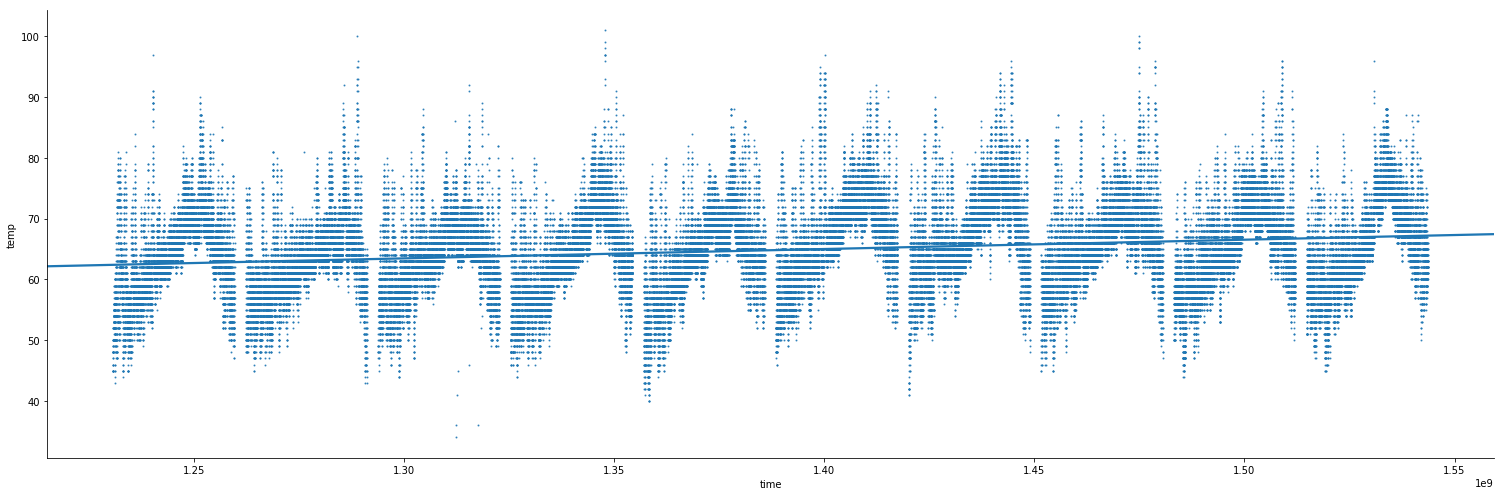

In [123]:
import seaborn as sns
sns.lmplot(x='time',y='temp',data=df2,fit_reg=True, height=7, aspect=3, scatter_kws={"s": 1}) 

In [103]:
df.drop('temp', axis=1, inplace=True)

In [35]:
import pandas as pd
temp = pd.read_csv('temp.csv')
temp['date'] = pd.to_datetime(temp['date'])

In [42]:
temp = temp[temp.date < pd.datetime(2019,12,1)]
temp

,time,temp,date
0,1546332660,49,2019-01-01 08:51:00
1,1546336260,47,2019-01-01 09:51:00
2,1546339860,47,2019-01-01 10:51:00
3,1546343460,47,2019-01-01 11:51:00
4,1546347060,46,2019-01-01 12:51:00
...,...,...,...
9521,1575143460,63,2019-11-30 19:51:00
9522,1575147060,63,2019-11-30 20:51:00
9523,1575150660,63,2019-11-30 21:51:00
9524,1575154260,63,2019-11-30 22:51:00


In [90]:
df.groupby('date').time.count().values

array([ 32,  67,  51,  52,  48,  35,  39,  60,  47,  45,  53,  50,  44,
        48,  55,  48,  60,  62,  36,  38,  47,  39,  38,  39,  40,  46,
        40,  41,  41,  36,  49,  60,  57,  38,  46,  44,  30,  50,  56,
        53,  41,  49,  37,  52, 110,  57,  33,  26,  45,  46,  49,  41,
        51,  44,  27,  58,  56,  59,  48,  48,  44,  26,  56,  52,  36,
        47,  34,  36,  54,  59,  47,  38,  49,  50,  50,  35,  45,  48,
        31,  41,  49,  22,  41,  50,  43,  46,  39,  44,  46,  29,  46,
        26,  46,  44,  42,  42,  45,  42,  38,  41,  48,  48,  48,  42,
        38,  43,  42,  49,  48,  47,  41,  45,  35,  62,  48,  50,  51,
        39,  32,  53,  47,  42,  50,  64,  45,  54,  34,  49,  46,  49,
        50,  38,  41,  31,  50,  58,  46,  43,  31,  39,  37,  46,  41,
        56,  50,  33,  30,  66,  50,  45,  46,  42,  49,  48,  56,  51,
        45,  49,  54,  33,  56,  67,  57,  44,  35,  47,  40,  50,  42,
        59,  42,  48,  39,  49,  56,  61,  45,  38,  33,  56,  4

In [83]:
df.pivot_table('temp', 'address_zip', 'call_category', 'count').describe()

call_category,FIRE,HAZARD,RESCUE
count,43.000000,47.000000,40.000000
mean,96.953488,231.936170,31.825000
std,90.071388,246.334026,50.791624
min,1.000000,1.000000,1.000000
25%,31.500000,19.000000,13.750000
50%,69.000000,199.000000,23.500000
75%,135.500000,341.500000,34.500000
max,379.000000,1406.000000,329.000000


In [79]:
df.to_csv('type_zip_time_temp.csv', index=False)

In [3]:
import pandas as pd
df = pd.read_csv('type_zip_time_temp.csv')

/Users/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


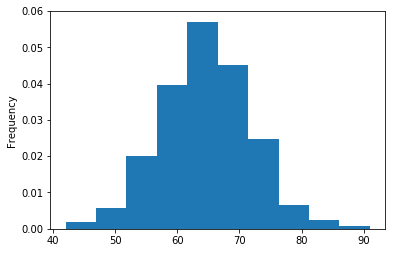

In [28]:
df.temp.plot('hist', density=True);

/Users/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


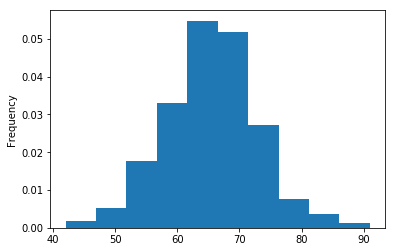

In [26]:
df[df['call_category'] == 'FIRE']['temp'].plot('hist', density=True);

In [22]:
from scipy import stats
np.random.seed(12345678)

In [23]:
stats.ttest_ind(df[df['call_category'] == 'FIRE']['temp'], df['temp'], equal_var=False)

Ttest_indResult(statistic=6.764279638730257, pvalue=1.4595436815063294e-11)

In [35]:
fd = !ls *.csv
fd = fd[:-3]
fd

['fd_incidents_2009_datasd_v1.csv',
 'fd_incidents_2010_datasd_v1.csv',
 'fd_incidents_2011_datasd_v1.csv',
 'fd_incidents_2012_datasd_v1.csv',
 'fd_incidents_2013_datasd_v1.csv',
 'fd_incidents_2014_datasd_v1.csv',
 'fd_incidents_2015_datasd_v1.csv',
 'fd_incidents_2016_datasd_v1.csv',
 'fd_incidents_2017_datasd_v1.csv',
 'fd_incidents_2018_datasd_v1.csv',
 'fd_incidents_2019_datasd_v1.csv']

In [45]:
call_category = []
date_response = []
address_zip = []
time = []
date = []
for i in fd:
    df = pd.read_csv(i)
    df = df[df['problem'].isin(['FIRE', 'HAZARD'])].dropna()[['call_category', 'date_response', 'address_zip']].reset_index(drop=True)
    df['date_response'] = pd.to_datetime(df['date_response'])
    # df['address_zip'] = df['address_zip'].astype(int)
    df['time'] = (df.date_response.astype(int)/10**9).astype(int)
    df['date'] = df['date_response'].dt.strftime('%Y%m%d')
    call_category += df['call_category'].tolist()
    date_response += df['date_response'].tolist()
    address_zip += df['address_zip'].tolist()
    time += df['time'].tolist()
    date += df['date'].tolist()

/Users/peter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
res = pd.DataFrame({'call_category': call_category, 'date_response': date_response, 'address_zip': address_zip, 'time': time, 'date': date}).sort_values('time', ascending=True)

In [60]:
import re
res['address_zip'] = res['address_zip'].apply(lambda x: re.sub('[^0-9]', '', str(x)))

In [66]:
res['address_zip'] = res['address_zip'].astype(int)

In [65]:
res.drop(153833, inplace=True)

In [3]:
res = pd.read_csv('2009-2019.csv')
res

,call_category,date_response,address_zip,time,date,year,year_month
0,HAZARD,2009-01-01 00:19:53,92101,1230769193,20090101,2009,200901
1,FIRE,2009-01-01 00:21:10,92109,1230769270,20090101,2009,200901
2,HAZARD,2009-01-01 01:15:00,92102,1230772500,20090101,2009,200901
3,HAZARD,2009-01-01 01:18:26,92101,1230772706,20090101,2009,200901
4,FIRE,2009-01-01 01:19:48,92105,1230772788,20090101,2009,200901
...,...,...,...,...,...,...,...
171630,HAZARD,2019-11-30 20:44:51,92124,1575146691,20191130,2019,201911
171631,FIRE,2019-11-30 20:47:00,92122,1575146820,20191130,2019,201911
171632,HAZARD,2019-11-30 21:17:00,92124,1575148620,20191130,2019,201911
171633,FIRE,2019-11-30 23:09:17,92103,1575155357,20191130,2019,201911


In [4]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [8]:
res.pivot_table('call_category', 'address_zip', 'year_month', 'count').fillna(0).to_json()

'{"0":{"91911":0.0,"91932":0.0,"91941":0.0,"91942":1.0,"91945":0.0,"91950":1.0,"92014":10.0,"92025":0.0,"92027":2.0,"92029":0.0,"92037":86.0,"92064":0.0,"92065":0.0,"92067":0.0,"92071":0.0,"92075":0.0,"92093":8.0,"92101":138.0,"92102":39.0,"92103":50.0,"92104":40.0,"92105":39.0,"92106":16.0,"92107":20.0,"92108":29.0,"92109":56.0,"92110":25.0,"92111":48.0,"92113":54.0,"92114":38.0,"92115":46.0,"92116":21.0,"92117":39.0,"92119":10.0,"92120":21.0,"92121":40.0,"92122":32.0,"92123":54.0,"92124":24.0,"92126":46.0,"92127":13.0,"92128":29.0,"92129":20.0,"92130":49.0,"92131":17.0,"92133":1.0,"92134":0.0,"92136":0.0,"92139":11.0,"92140":0.0,"92145":4.0,"92154":51.0,"92161":0.0,"92173":19.0,"92182":1.0},"1":{"91911":1.0,"91932":0.0,"91941":0.0,"91942":0.0,"91945":0.0,"91950":0.0,"92014":10.0,"92025":1.0,"92027":1.0,"92029":0.0,"92037":74.0,"92064":0.0,"92065":0.0,"92067":0.0,"92071":0.0,"92075":0.0,"92093":8.0,"92101":152.0,"92102":50.0,"92103":37.0,"92104":25.0,"92105":46.0,"92106":17.0,"92107":

In [75]:
res['ymd_unix'] = pd.to_datetime(res.year_month).astype(int)/10**9

In [70]:
res['year_month'] = res['year_month'].apply(lambda x: str(x) + '01')
res['year_month']

,call_category,date_response,address_zip,time,date,year,year_month,ymd_unix
0,HAZARD,2009-01-01 00:19:53,92101,1230769193,20090101,2009,20090101,1230768000
1,FIRE,2009-01-01 00:21:10,92109,1230769270,20090101,2009,20090101,1230768000
2,HAZARD,2009-01-01 01:15:00,92102,1230772500,20090101,2009,20090101,1230768000
3,HAZARD,2009-01-01 01:18:26,92101,1230772706,20090101,2009,20090101,1230768000
4,FIRE,2009-01-01 01:19:48,92105,1230772788,20090101,2009,20090101,1230768000
...,...,...,...,...,...,...,...,...
171630,HAZARD,2019-11-30 20:44:51,92124,1575146691,20191130,2019,20191101,1575072000
171631,FIRE,2019-11-30 20:47:00,92122,1575146820,20191130,2019,20191101,1575072000
171632,HAZARD,2019-11-30 21:17:00,92124,1575148620,20191130,2019,20191101,1575072000
171633,FIRE,2019-11-30 23:09:17,92103,1575155357,20191130,2019,20191101,1575072000


In [77]:
res['ymd_unix'] = res['ymd_unix'].astype(int)

In [98]:
res['index'] = (res['year_month'].astype(int) - 20090101)

In [1]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
res['year_month'] = le.fit_transform(res.year_month)

In [7]:
res

,call_category,date_response,address_zip,time,date,year,year_month
0,HAZARD,2009-01-01 00:19:53,92101,1230769193,20090101,2009,0
1,FIRE,2009-01-01 00:21:10,92109,1230769270,20090101,2009,0
2,HAZARD,2009-01-01 01:15:00,92102,1230772500,20090101,2009,0
3,HAZARD,2009-01-01 01:18:26,92101,1230772706,20090101,2009,0
4,FIRE,2009-01-01 01:19:48,92105,1230772788,20090101,2009,0
...,...,...,...,...,...,...,...
171630,HAZARD,2019-11-30 20:44:51,92124,1575146691,20191130,2019,130
171631,FIRE,2019-11-30 20:47:00,92122,1575146820,20191130,2019,130
171632,HAZARD,2019-11-30 21:17:00,92124,1575148620,20191130,2019,130
171633,FIRE,2019-11-30 23:09:17,92103,1575155357,20191130,2019,130
